# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [5]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[1]


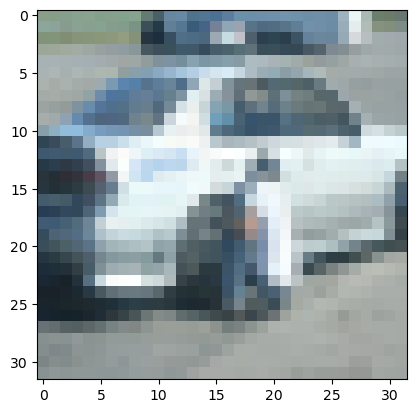

In [11]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

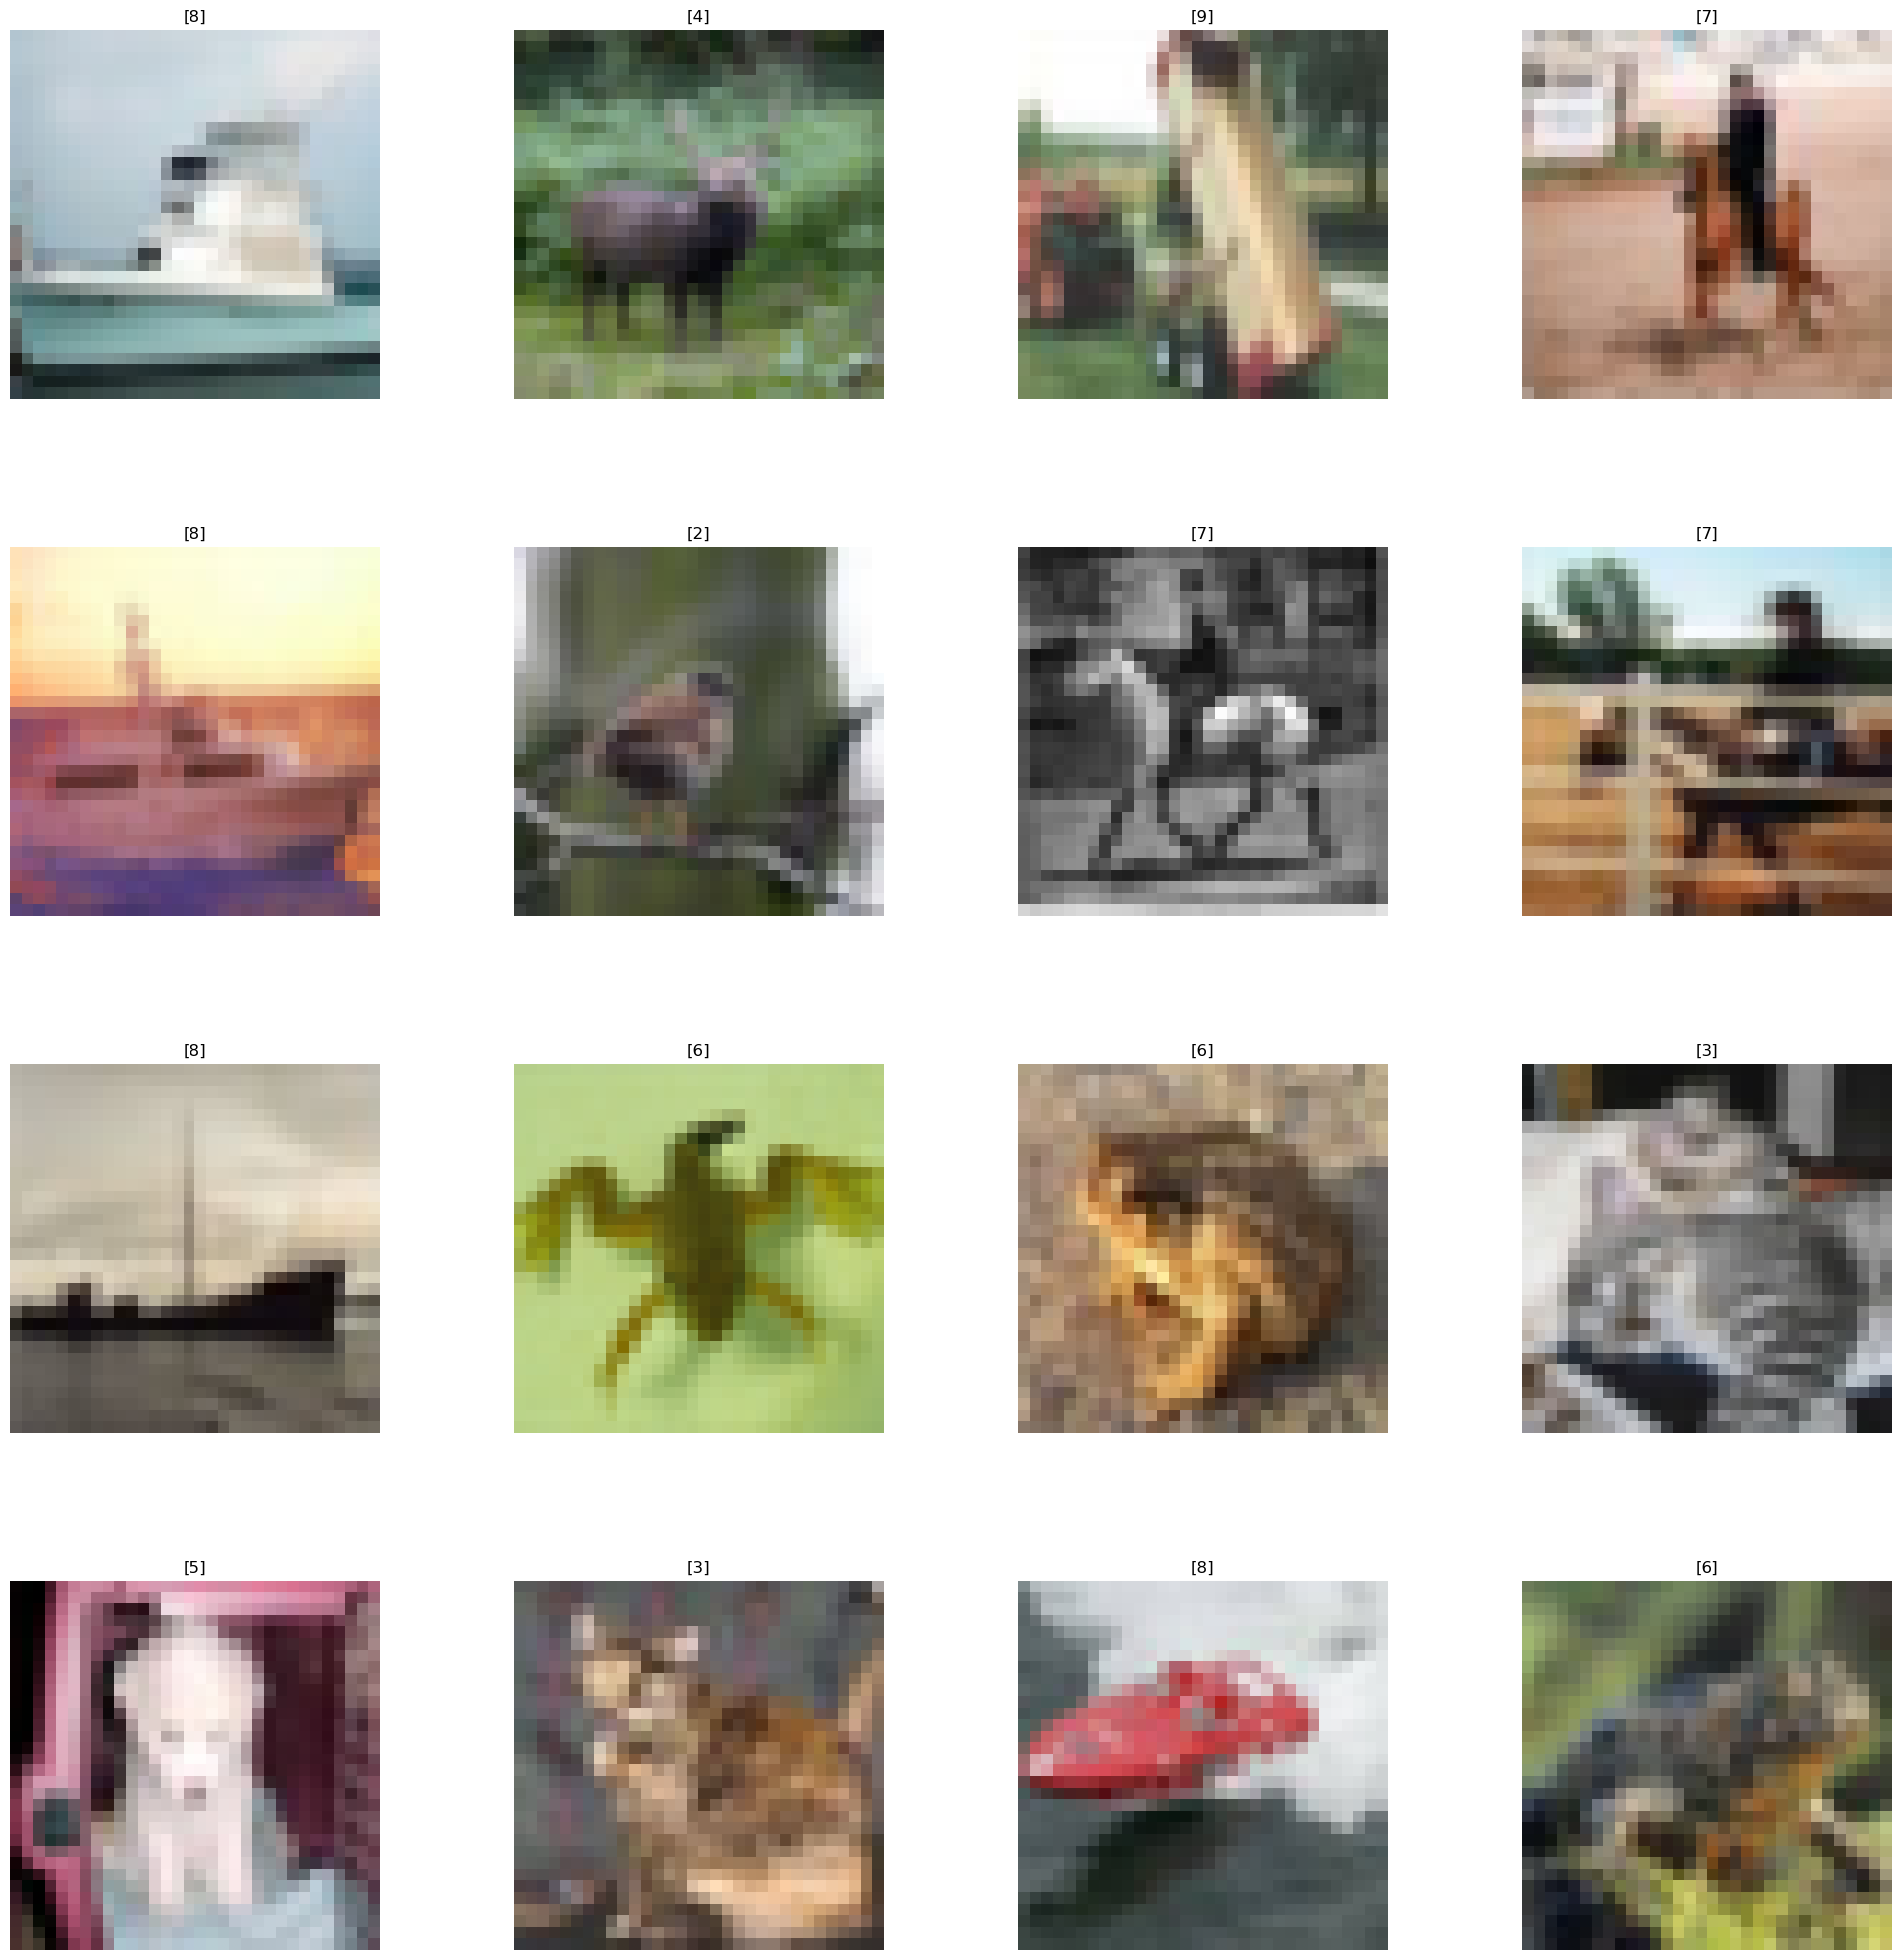

In [12]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [13]:
n_training

50000

# STEP #3: DATA PREPARATION

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
number_cat = 10

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [20]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [21]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [22]:
X_train = X_train/255
X_test = X_test/255


In [23]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
Input_shape = X_train.shape[1:]

In [26]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

from keras.callbacks import TensorBoard

In [29]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

C:\Users\agnis\Downloads\agnish\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [31]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 25, shuffle = True)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 551s 346ms/step - accuracy: 0.2873 - loss: 1.9161
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 232s 148ms/step - accuracy: 0.5633 - loss: 1.2314
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 167ms/step - accuracy: 0.6544 - loss: 1.0052
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 173ms/step - accuracy: 0.6974 - loss: 0.8952
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 275s 176ms/step - accuracy: 0.7139 - loss: 0.8562
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - accuracy: 0.7267 - loss: 0.8260
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 275s 176ms/step - accuracy: 0.7383 - loss: 0.7977
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 271s 173ms/step - accuracy: 0.7512 - loss: 0.7652
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 162ms/step - accuracy: 0.7590 - loss: 0.7433
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 131ms/step - accuracy: 0.7643 - loss: 0.7327
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 127ms/step - accuracy: 0.7672 -

# STEP #5: EVALUATE THE MODEL

In [33]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.7640 - loss: 0.7723
Test Accuracy: 0.7623000144958496


In [34]:
predicted_classes = cnn_model.predict(X_test) 
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step


array([[8.7971687e-03, 2.0390149e-02, 7.9590185e-03, ..., 6.6988170e-03,
        6.5464139e-02, 3.3330746e-02],
       [4.8180443e-04, 5.9446803e-04, 7.8917068e-08, ..., 8.6951623e-08,
        9.9887675e-01, 4.6516539e-05],
       [4.8958864e-02, 1.7141403e-01, 8.4789027e-04, ..., 8.7754941e-04,
        7.0421511e-01, 7.0185468e-02],
       ...,
       [1.6969934e-09, 1.5207161e-10, 2.6080426e-07, ..., 1.9309405e-04,
        1.8218370e-10, 5.5080279e-10],
       [1.4677716e-02, 9.8209882e-01, 1.0637938e-03, ..., 9.3818974e-04,
        4.6957688e-05, 5.6778966e-04],
       [1.3107210e-21, 1.7364589e-18, 5.7351600e-24, ..., 1.0000000e+00,
        9.1001516e-21, 8.7248222e-15]], dtype=float32)

In [35]:
y_test = y_test.argmax(1)

In [36]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [47]:
predicted_classes

array([[8.7971687e-03, 2.0390149e-02, 7.9590185e-03, ..., 6.6988170e-03,
        6.5464139e-02, 3.3330746e-02],
       [4.8180443e-04, 5.9446803e-04, 7.8917068e-08, ..., 8.6951623e-08,
        9.9887675e-01, 4.6516539e-05],
       [4.8958864e-02, 1.7141403e-01, 8.4789027e-04, ..., 8.7754941e-04,
        7.0421511e-01, 7.0185468e-02],
       ...,
       [1.6969934e-09, 1.5207161e-10, 2.6080426e-07, ..., 1.9309405e-04,
        1.8218370e-10, 5.5080279e-10],
       [1.4677716e-02, 9.8209882e-01, 1.0637938e-03, ..., 9.3818974e-04,
        4.6957688e-05, 5.6778966e-04],
       [1.3107210e-21, 1.7364589e-18, 5.7351600e-24, ..., 1.0000000e+00,
        9.1001516e-21, 8.7248222e-15]], dtype=float32)

In [49]:
predicted_classes=predicted_classes.argmax(1)

In [51]:
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

<Axes: >

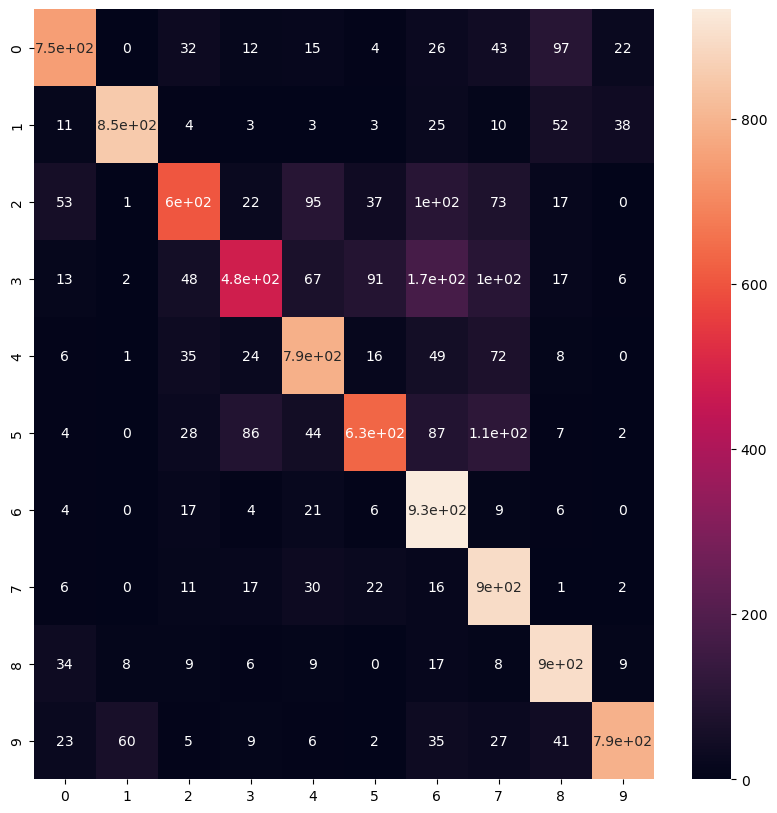

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [57]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cnn.keras')
cnn_model.save(model_path)